# BERT Fine-tuning results

In [7]:
import wandb
import matplotlib.pyplot as plt

In [8]:
wandb.login(key='16369bd7209659e59c09993b5ec54d3950923d45')
api = wandb.Api()

project_name = "bert-multiling-training"

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/gustaw/.netrc


In [9]:
runs = api.runs(f"sf-kozlowski-university-of-warsaw/{project_name}")
history = runs[0].history()
history.head()

,eval/runtime,eval/O_recall,_timestamp,train/global_step,eval/precision,train/grad_norm,eval/overall_accuracy,eval/f1,eval/steps_per_second,eval/recall,_runtime,eval/loss,_step,train/epoch,eval/B-COUPON_recall,eval/samples_per_second,train/loss,train/learning_rate,eval/I-COUPON_recall
0,NaN,NaN,1.741807e+09,20,NaN,7.516974,NaN,NaN,NaN,NaN,8.379905,NaN,1,0.052770,NaN,NaN,0.4502,0.000020,NaN
1,NaN,NaN,1.741807e+09,40,NaN,9.072651,NaN,NaN,NaN,NaN,9.471138,NaN,3,0.105541,NaN,NaN,0.1913,0.000019,NaN
2,NaN,NaN,1.741807e+09,60,NaN,1.676665,NaN,NaN,NaN,NaN,10.158607,NaN,5,0.158311,NaN,NaN,0.1371,0.000019,NaN
3,NaN,NaN,1.741807e+09,90,NaN,8.840560,NaN,NaN,NaN,NaN,11.284616,NaN,8,0.237467,NaN,NaN,0.0897,0.000018,NaN
4,NaN,NaN,1.741807e+09,110,NaN,5.550970,NaN,NaN,NaN,NaN,11.984596,NaN,10,0.290237,NaN,NaN,0.0760,0.000018,NaN


In [10]:
history.columns

Index(['eval/runtime', 'eval/O_recall', '_timestamp', 'train/global_step',
       'eval/precision', 'train/grad_norm', 'eval/overall_accuracy', 'eval/f1',
       'eval/steps_per_second', 'eval/recall', '_runtime', 'eval/loss',
       '_step', 'train/epoch', 'eval/B-COUPON_recall',
       'eval/samples_per_second', 'train/loss', 'train/learning_rate',
       'eval/I-COUPON_recall'],
      dtype='object')

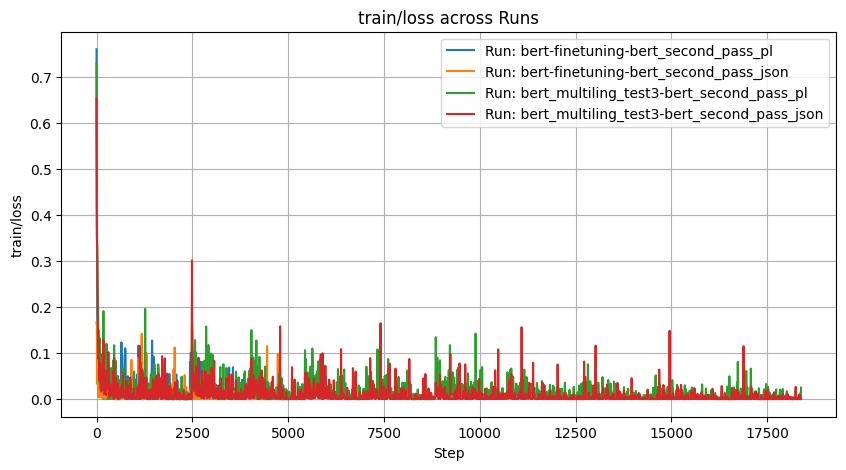

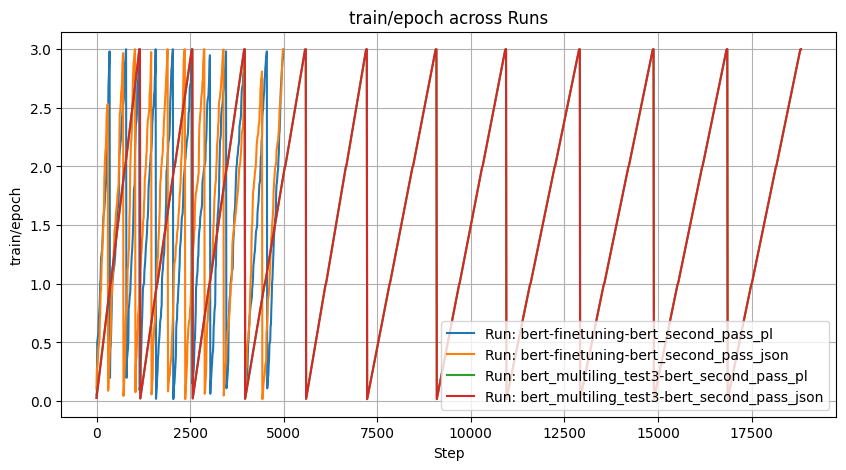

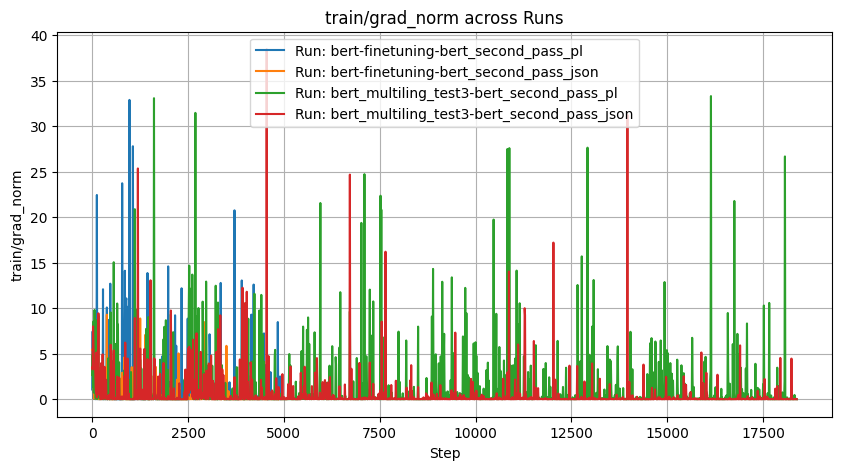

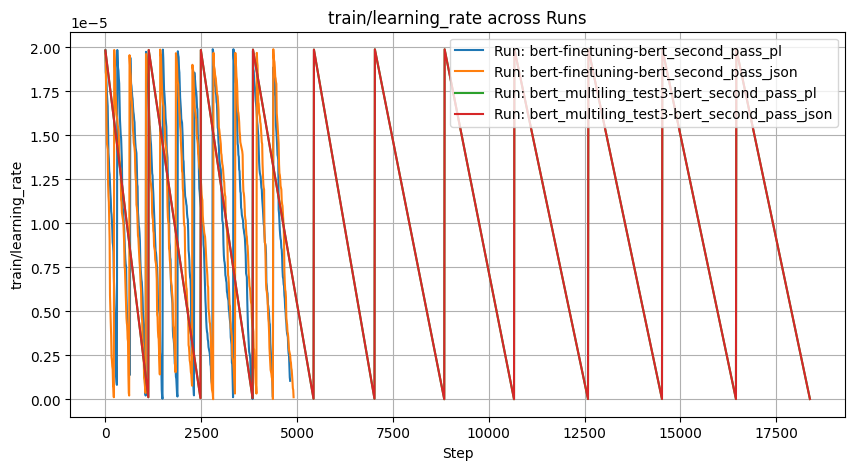

In [11]:
def plot_runs_data(runs, metric):
    plt.figure(figsize=(10, 5))
    for run in runs:
        hist = run.history()
        if hist.shape[0] == 0:
            continue
        if metric in hist.columns:
            # filter-out nans
            data = hist[metric].dropna()
            labels = [x*10 for x in range(data.shape[0])]
            #print(hist.columns)
            #print(hist[metric])
            plt.plot(labels, data, label=f"Run: {run.name}")

    plt.xlabel("Step")
    plt.ylabel(metric)
    plt.title(f"{metric} across Runs")
    plt.legend()
    plt.grid()
    plt.show()

plot_runs_data(runs, "train/loss")
plot_runs_data(runs, "train/epoch")
plot_runs_data(runs, "train/grad_norm")
plot_runs_data(runs, "train/learning_rate")

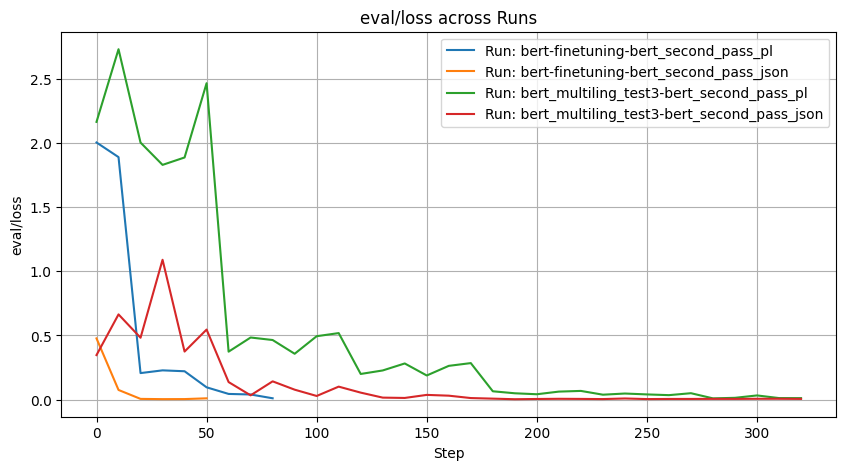

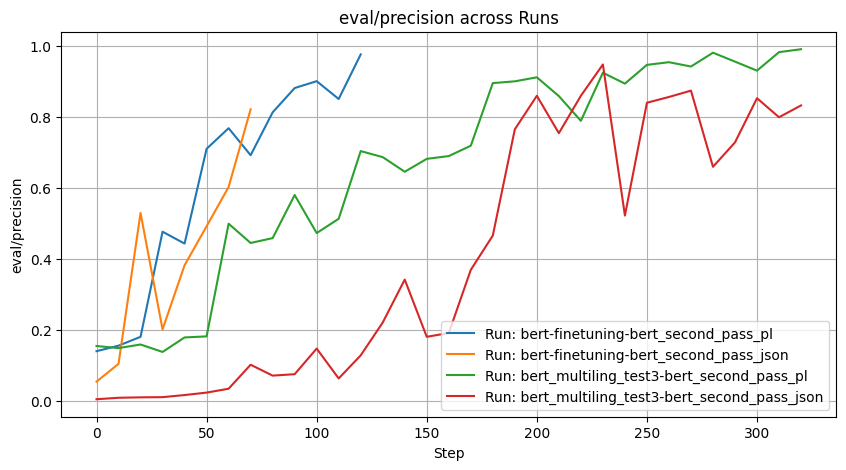

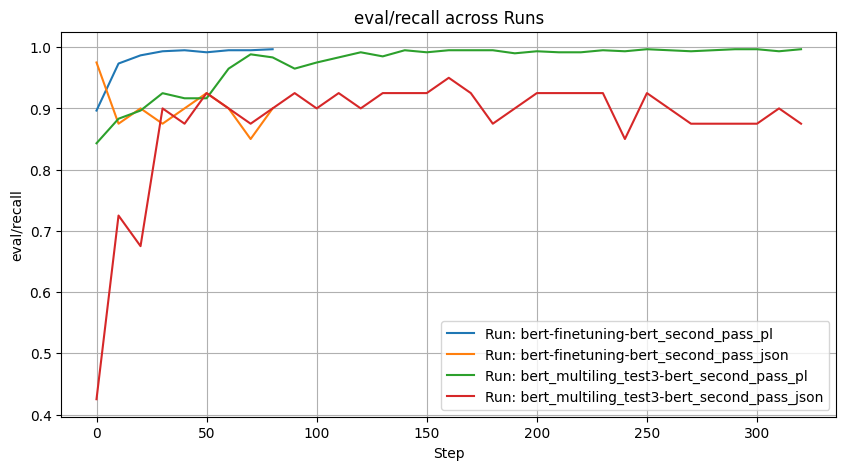

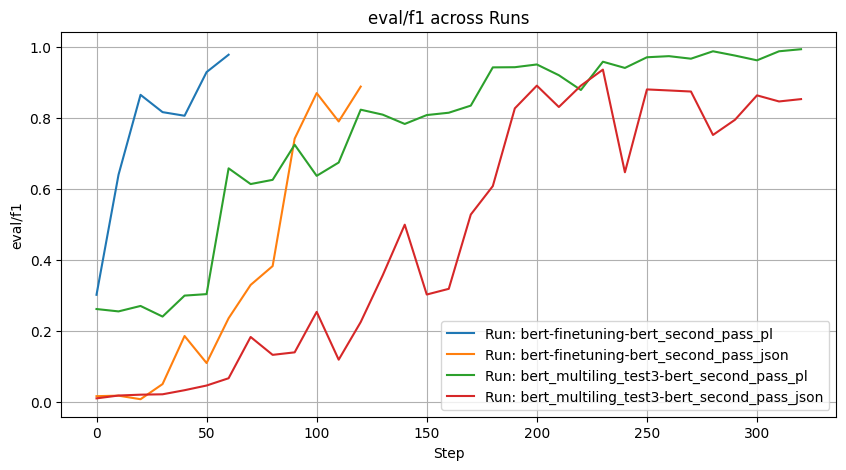

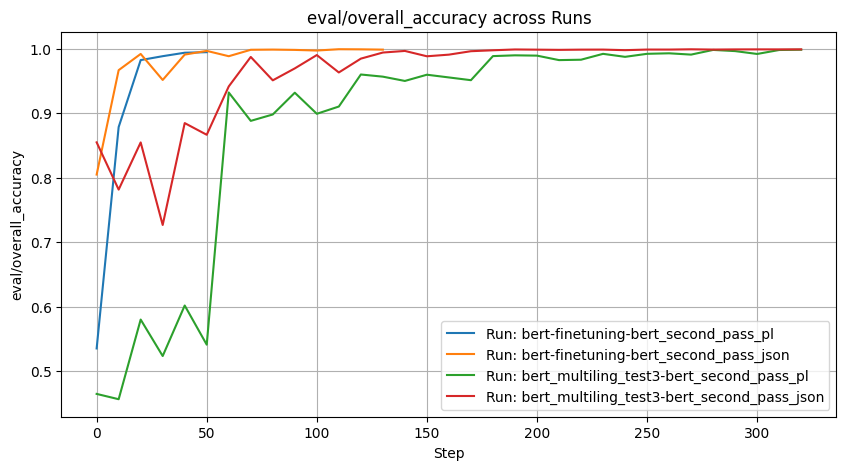

/tmp/ipykernel_6411/66080319.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


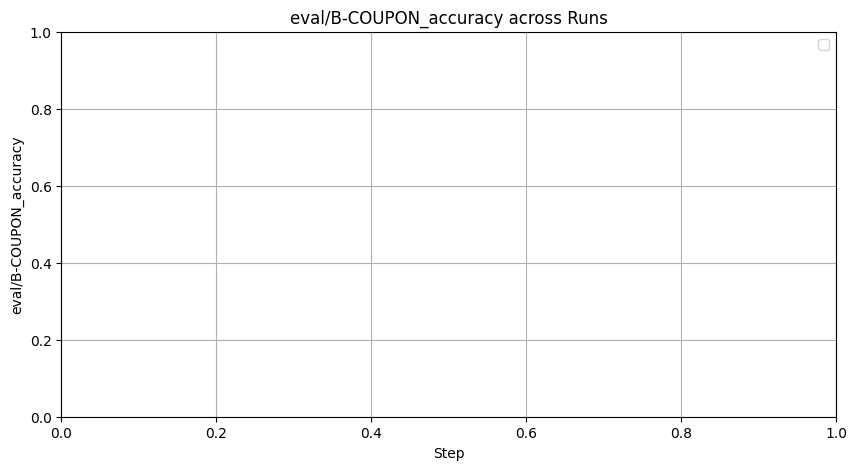

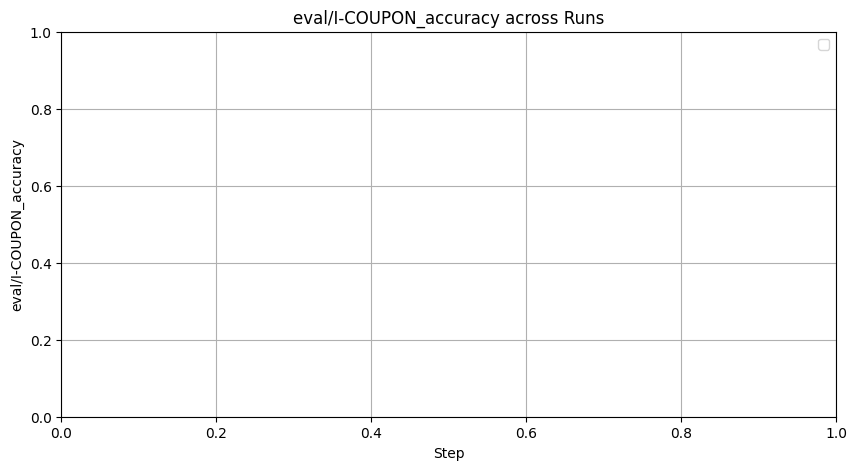

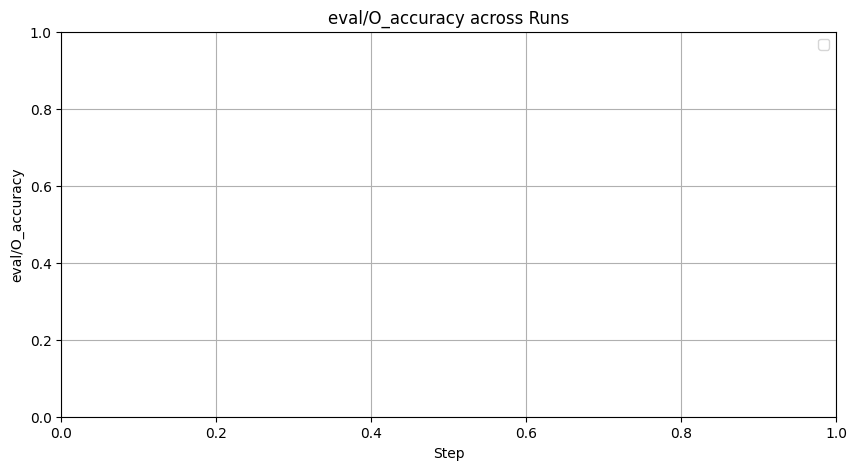

In [12]:
plot_runs_data(runs, "eval/loss")
plot_runs_data(runs, "eval/precision")
plot_runs_data(runs, "eval/recall")
plot_runs_data(runs, "eval/f1")
plot_runs_data(runs, "eval/overall_accuracy")
plot_runs_data(runs, "eval/B-COUPON_accuracy")
plot_runs_data(runs, "eval/I-COUPON_accuracy")
plot_runs_data(runs, "eval/O_accuracy")